In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import requests
pd.options.display.max_rows = 5000 
pd.options.display.max_columns = 200

### Part 1
导入数据，创建df，统计各收益天数

In [2]:
def days_analysis(excel_name, p1_date, p1_price,p1_wprice):
#     读取数据,回复index，简化col names, 变量化配售日期，配售价格和权证价格
    df = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/si_stocks/{}.csv'.format(excel_name))
    df.drop('Unnamed: 0',axis=1, inplace=True)
    df.columns = ['dates', 'close', 'volume']
    p1_date = p1_date
    p1_price = p1_price
    p1_wprice = p1_wprice
#     从配售日期开始截取数据，将数据从远期往近期排列
    df = df[df['dates']>=p1_date]
    df = df[::-1].reset_index(drop=True)
#     分别计算股价收益，权证收益和总收益（自然数，而非百分比）
    df['share_rtn' ]= [(x-p1_price) if (x-p1_price)>0 else 0 for x in df['close']]
#     权证价格，首先判断不为0，权证收益小于0则等于0，权证收益大于零则按正常记录
    new = []
    for x in df['close']:
        if p1_wprice == 0:
            new.append(0)
        elif (x-p1_wprice)<=0 :
            new.append(0)
        else :
            new.append(x-p1_wprice)
    df['warrant_rtn']=new
        
    df['total_rtn'] = df['share_rtn' ] + df['warrant_rtn']
#     读取数据中最高收盘价，最高收盘价日期，和最高收益（自然数）,最高ROI（小数百分比）
    trade_high = df['close'].max()
#     trade_high_date = (df.loc[df['close']==df['close'].max(), 'dates'].item())
    highest_rtn = df['total_rtn'].max()
    highest_roi = np.round(df['total_rtn'].max()/p1_price,4)
    
#     新建一个df，每行只保留综合数据
    placing = pd.DataFrame({'placing':excel_name, 'placing_date':p1_date, 'placing_price':p1_price, 'warrant_price':p1_wprice ,
                          'trade_high':trade_high, 'highest_rtn':highest_rtn, 'highest_roi':highest_roi},index=[0]) #'trade_high_date':trade_high_date, 代码有问题
    
#     天数统计
    placing['all_trade_days'] = len(df['close'])
    placing['20%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.2].close)
    placing['30%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.3].close)
    placing['40%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.4].close)
    placing['50%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.5].close)
    placing['70%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.7].close)
    placing['100%_up_days'] = len(df[df['total_rtn']/p1_price>= 1.0].close)
    placing['150%_up_days'] = len(df[df['total_rtn']/p1_price>= 1.5].close)
    placing['250%_up_days'] = len(df[df['total_rtn']/p1_price>= 2.5].close)
    placing['300%_up_days'] = len(df[df['total_rtn']/p1_price>= 3.0].close)
    placing['350%_up_days'] = len(df[df['total_rtn']/p1_price>= 3.5].close)
    placing['400%_up_days'] = len(df[df['total_rtn']/p1_price>= 4.0].close)
    placing['450%_up_days'] = len(df[df['total_rtn']/p1_price>= 4.5].close)
    placing['500%_up_days'] = len(df[df['total_rtn']/p1_price>= 5.0].close)
    placing['1000%_up_days'] = len(df[df['total_rtn']/p1_price>= 10.0].close)
    
    
    return(placing)
#     print(placing.head(), '\n','\n', p1_date, p1_price, p1_wprice)

- ##### 缺失注释： pre因为API问题无法得到数据，Incanthera因为是在Aquis上市的，暂时无法得到数据

In [3]:
cobr_p1 = days_analysis('cobr','2020-01-01', 1.00, 2.00)

cobr_p2 = days_analysis('cobr','2020-09-01', 2.30, 3.00)

palm_p1 = days_analysis('palm', '2020-01-01', 6.0, 12.0)

palm_p2 = days_analysis('palm', '2020-07-01', 6.5, 0.0)

palm_p3 = days_analysis('palm', '2020-12-01', 10.0, 0.0)

amte_p1 = days_analysis('amte','2019-07-01', 73.5, 0.0)

amte_p2 = days_analysis('amte','2020-04-01', 73.5, 0.0)

amte_p3 = days_analysis('amte','2021-03-01', 175.0, 0.0)

ecr_p1 = days_analysis('ecr', '2020-04-01', 0.5, 1.0)

ecr_p2 = days_analysis('ecr', '2020-07-01', 1.3, 2.1)

kat_p1 = days_analysis('kat','2020-07-01',1.5, 3.0)

kat_p2 = days_analysis('kat','2020-02-01',2.0, 3.0)

kat_p3 = days_analysis('kat','2021-01-01',2.0, 3.0)

irr_p1 = days_analysis('irr', '2020-05-01', 7.0, 12.0)

irr_p2 = days_analysis('irr', '2021-04-01', 20.0, 0.0)

mnrg_p1 = days_analysis('mnrg','2020-07-01', 0.6, 0.0)

mnrg_p2 = days_analysis('mnrg','2021-03-01', 0.6, 1.0)

ccz_p1 = days_analysis('ccz', '2020-08-01', 1.7, 2.8)

ccz_p2 = days_analysis('ccz', '2021-06-01', 2.3, 4.4)

imm_p1 = days_analysis('imm', '2020-09-01', 11.0, 0)

avo_p1 = days_analysis('avo', '2020-11-01', 30, 0.0 )

avo_p2 = days_analysis('avo', '2021-01-01', 40, 0.0 )

cgh_p1 = days_analysis('cgh', '2021-02-01',26.0, 0.0)

knb_p1 = days_analysis('knb', '2020-04-01',0.0005, 0.0)

knb_p2 = days_analysis('knb', '2021-02-01',6.5, 0.0)

thr_p1 = days_analysis('thr', '2020-09-01', 0.6, 1.0)

kav_p1 = days_analysis('kav','2020-04-01', 0.8, 1.0)

kav_p2 = days_analysis('kav','2020-12-01', 2.75, 4.25)

acp_p1 = days_analysis('acp', '2019-09-01', 1.8, 3.0)

In [24]:
frames = [cobr_p1, cobr_p2, palm_p1,palm_p2,palm_p3, amte_p1,amte_p2,amte_p3,
         ecr_p1, ecr_p2,kat_p1, kat_p2, kat_p3, irr_p1, irr_p2, mnrg_p1, mnrg_p2,
         ccz_p1, ccz_p2, imm_p1, avo_p1, avo_p2, cgh_p1, knb_p1, knb_p2, thr_p1,
         kav_p1, kav_p2, acp_p1]
days_analysis = pd.concat(frames)
days_analysis

,placing,placing_date,placing_price,warrant_price,trade_high,highest_rtn,highest_roi,all_trade_days,20%_up_days,30%_up_days,40%_up_days,50%_up_days,70%_up_days,100%_up_days,150%_up_days,250%_up_days,300%_up_days,350%_up_days,400%_up_days,450%_up_days,500%_up_days,1000%_up_days
0,cobr,2020-01-01,1.0000,2.00,3.500,4.0000,4.0000,459,423,411,404,400,346,226,163,50,24,7,1,0,0,0
0,cobr,2020-09-01,2.3000,3.00,3.500,1.7000,0.7391,301,43,24,10,7,1,0,0,0,0,0,0,0,0,0
0,palm,2020-01-01,6.0000,12.00,17.000,16.0000,2.6667,464,339,325,321,313,287,210,100,3,0,0,0,0,0,0
0,palm,2020-07-01,6.5000,0.00,17.000,10.5000,1.6154,344,324,321,311,299,258,146,5,0,0,0,0,0,0,0
0,palm,2020-12-01,10.0000,0.00,17.000,7.0000,0.7000,236,198,143,60,18,2,0,0,0,0,0,0,0,0,0
0,amte,2019-07-01,73.5000,0.00,327.000,253.5000,3.4490,166,166,166,166,166,166,166,150,52,12,0,0,0,0,0
0,amte,2020-04-01,73.5000,0.00,327.000,253.5000,3.4490,166,166,166,166,166,166,166,150,52,12,0,0,0,0,0
0,amte,2021-03-01,175.0000,0.00,327.000,152.0000,0.8686,166,112,85,66,43,8,0,0,0,0,0,0,0,0,0
0,ecr,2020-04-01,0.5000,1.00,4.250,7.0000,14.0000,405,397,396,390,380,345,342,341,338,327,303,265,197,150,52
0,ecr,2020-07-01,1.3000,2.10,4.250,5.1000,3.9231,344,314,285,225,150,116,99,78,50,26,5,0,0,0,0


In [28]:
days_analysis[(days_analysis['placing']=='ccz')|(days_analysis['placing']=='thr')]

,placing,placing_date,placing_price,warrant_price,trade_high,highest_rtn,highest_roi,all_trade_days,20%_up_days,30%_up_days,40%_up_days,50%_up_days,70%_up_days,100%_up_days,150%_up_days,250%_up_days,300%_up_days,350%_up_days,400%_up_days,450%_up_days,500%_up_days,1000%_up_days
0,ccz,2020-08-01,1.7,2.8,4.400,4.300,2.5294,320,243,210,178,105,42,23,20,1,0,0,0,0,0,0
0,ccz,2021-06-01,2.3,4.4,2.875,0.575,0.2500,113,2,0,0,0,0,0,0,0,0,0,0,0,0,0
0,thr,2020-09-01,0.6,1.0,1.275,0.950,1.5833,301,279,232,192,127,37,30,5,0,0,0,0,0,0,0


In [5]:
days_analysis.describe()

,placing_price,warrant_price,trade_high,highest_rtn,highest_roi,all_trade_days,20%_up_days,30%_up_days,40%_up_days,50%_up_days,70%_up_days,100%_up_days,150%_up_days,250%_up_days,300%_up_days,350%_up_days,400%_up_days,450%_up_days,500%_up_days,1000%_up_days
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.474155,2.018966,46.952759,30.881190,2816.395828,288.896552,183.413793,166.965517,151.965517,136.034483,116.413793,99.896552,78.724138,48.344828,37.172414,30.137931,26.413793,22.344828,19.034483,11.034483
std,36.144623,3.119421,97.892595,67.915406,15152.047070,113.537705,150.544136,149.539885,149.285796,149.086380,141.623625,125.197086,110.768064,93.633127,88.677614,83.430777,77.537787,67.305952,57.479489,37.836568
min,0.000500,0.000000,1.150000,0.480000,0.187500,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,0.000000,3.500000,3.700000,0.700000,184.000000,43.000000,22.000000,10.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.300000,1.000000,6.250000,5.400000,1.615400,301.000000,166.000000,166.000000,148.000000,105.000000,37.000000,23.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,3.000000,30.900000,16.000000,3.923100,344.000000,314.000000,285.000000,225.000000,184.000000,184.000000,184.000000,150.000000,50.000000,17.000000,5.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,12.000000,327.000000,253.500000,81599.000000,554.000000,511.000000,487.000000,477.000000,464.000000,429.000000,364.000000,341.000000,338.000000,327.000000,304.000000,290.000000,262.000000,216.000000,184.000000


### Part 2 
针对days_analysis进行视觉化处理

In [6]:
days = days_analysis

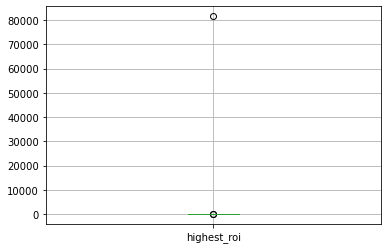

In [7]:
days.boxplot(['highest_roi']);

由于knb_p1的outlier影响力太大，因此需要剔除

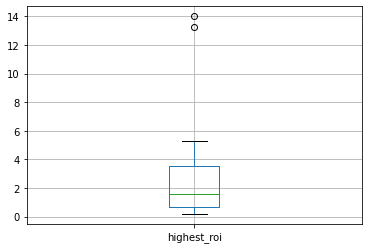

In [8]:
days[days['highest_roi']<=20].boxplot(['highest_roi']);

可以看到，依然有两个outlier的影响非常大，应该是ecr_p1和kav_p1,剔除看效果

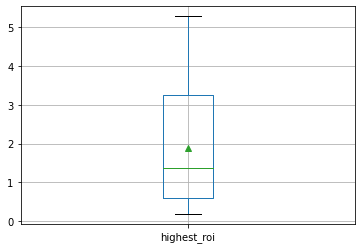

In [9]:
days[days['highest_roi']<=10].boxplot(['highest_roi'],showmeans=True);

<!-- ### 可以看到，除去几个超级高回报的case之外，回报的中位数约在1.4倍左右，平均数在1.9倍左右。 -->

#### 剔除超高回报后，其余case的中位数在1.4倍左右附近，而平均回报倍数在1.9倍左右。

In [10]:
len(days[days['highest_roi']<=10].highest_roi)

26

In [11]:
len(days[days['highest_roi']<=2].highest_roi)

17

In [12]:
np.round(len(days[days['highest_roi']<=2].highest_roi)/len(days[days['highest_roi']<=10].highest_roi), 2)

0.65

In [13]:
len(days[(days['highest_roi']>2)&(days['highest_roi']<=10)].highest_roi)

9

In [14]:
np.round(len(days[(days['highest_roi']>2)&(days['highest_roi']<=10)].highest_roi)/len(days[days['highest_roi']<=10].highest_roi), 2)

0.35

#### 10倍以下回报的case有26次。其中，回报小于2倍的有17次(这也是为什么中位数和平均数分别为1.4倍和1.9倍的原因，超高不考虑在内)，占65%；回报小于10倍，大于2倍的有9次，占35%。

In [15]:
days

,placing,placing_date,placing_price,warrant_price,trade_high,highest_rtn,highest_roi,all_trade_days,20%_up_days,30%_up_days,40%_up_days,50%_up_days,70%_up_days,100%_up_days,150%_up_days,250%_up_days,300%_up_days,350%_up_days,400%_up_days,450%_up_days,500%_up_days,1000%_up_days
0,cobr,2020-01-01,1.0000,2.00,3.500,4.0000,4.0000,459,423,411,404,400,346,226,163,50,24,7,1,0,0,0
0,cobr,2020-09-01,2.3000,3.00,3.500,1.7000,0.7391,301,43,24,10,7,1,0,0,0,0,0,0,0,0,0
0,palm,2020-01-01,6.0000,12.00,17.000,16.0000,2.6667,464,339,325,321,313,287,210,100,3,0,0,0,0,0,0
0,palm,2020-07-01,6.5000,0.00,17.000,10.5000,1.6154,344,324,321,311,299,258,146,5,0,0,0,0,0,0,0
0,palm,2020-12-01,10.0000,0.00,17.000,7.0000,0.7000,236,198,143,60,18,2,0,0,0,0,0,0,0,0,0
0,amte,2019-07-01,73.5000,0.00,327.000,253.5000,3.4490,166,166,166,166,166,166,166,150,52,12,0,0,0,0,0
0,amte,2020-04-01,73.5000,0.00,327.000,253.5000,3.4490,166,166,166,166,166,166,166,150,52,12,0,0,0,0,0
0,amte,2021-03-01,175.0000,0.00,327.000,152.0000,0.8686,166,112,85,66,43,8,0,0,0,0,0,0,0,0,0
0,ecr,2020-04-01,0.5000,1.00,4.250,7.0000,14.0000,405,397,396,390,380,345,342,341,338,327,303,265,197,150,52
0,ecr,2020-07-01,1.3000,2.10,4.250,5.1000,3.9231,344,314,285,225,150,116,99,78,50,26,5,0,0,0,0


In [25]:
days.describe()

,placing_price,warrant_price,trade_high,highest_rtn,highest_roi,all_trade_days,20%_up_days,30%_up_days,40%_up_days,50%_up_days,70%_up_days,100%_up_days,150%_up_days,250%_up_days,300%_up_days,350%_up_days,400%_up_days,450%_up_days,500%_up_days,1000%_up_days
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.474155,2.018966,46.952759,30.881190,2816.395828,288.896552,183.413793,166.965517,151.965517,136.034483,116.413793,99.896552,78.724138,48.344828,37.172414,30.137931,26.413793,22.344828,19.034483,11.034483
std,36.144623,3.119421,97.892595,67.915406,15152.047070,113.537705,150.544136,149.539885,149.285796,149.086380,141.623625,125.197086,110.768064,93.633127,88.677614,83.430777,77.537787,67.305952,57.479489,37.836568
min,0.000500,0.000000,1.150000,0.480000,0.187500,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,0.000000,3.500000,3.700000,0.700000,184.000000,43.000000,22.000000,10.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.300000,1.000000,6.250000,5.400000,1.615400,301.000000,166.000000,166.000000,148.000000,105.000000,37.000000,23.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,3.000000,30.900000,16.000000,3.923100,344.000000,314.000000,285.000000,225.000000,184.000000,184.000000,184.000000,150.000000,50.000000,17.000000,5.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,12.000000,327.000000,253.500000,81599.000000,554.000000,511.000000,487.000000,477.000000,464.000000,429.000000,364.000000,341.000000,338.000000,327.000000,304.000000,290.000000,262.000000,216.000000,184.000000


#### 下图显示各case的最高回报区间柱状图，依然是少于2倍回报的概率比较大。

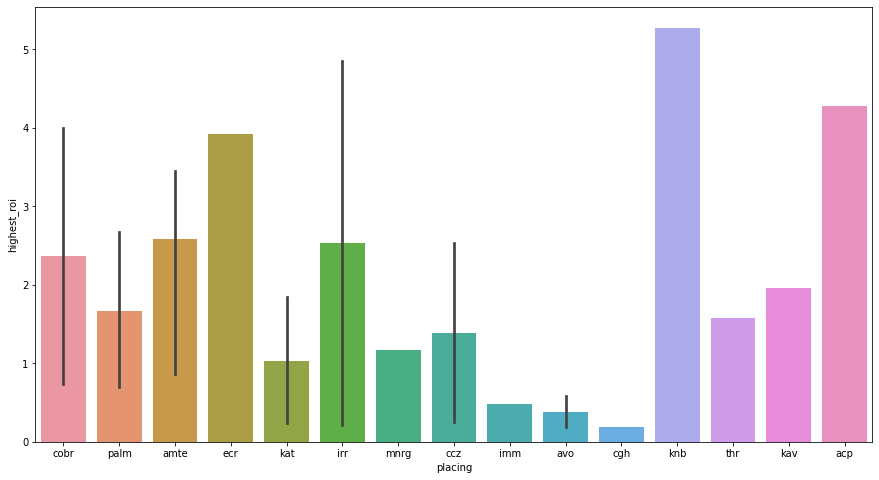

In [16]:
# sns.barplot(x="day", y="total_bill", data=tips)
fig = plt.figure(figsize=(15,8))
sns.barplot(x='placing', y='highest_roi', data=days[days['highest_roi']<=10]);

#### 以下，显示了20%利润的收获区间天数

#### 因为acp盈利天数较高影响整体观测，因此在以下分析中暂时剔除
#### 可以看到20%利润的操作空间是非常游刃有余的，均值是153天，空间很大

In [17]:
days.loc[(days['highest_roi']<=10)&(days['placing']!='acp')]['20%_up_days'].mean()

153.68

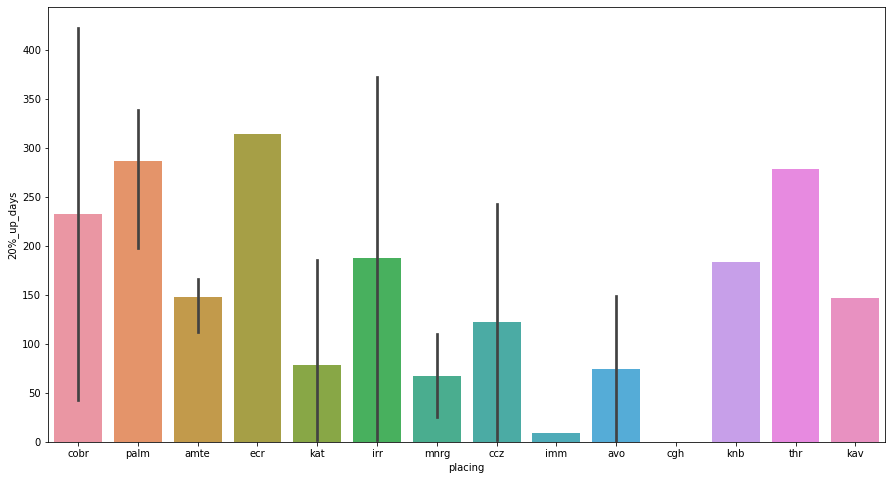

In [18]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x='placing', y='20%_up_days', data=days.loc[(days['highest_roi']<=10)&(days['placing']!='acp')]);

#### 100%收益的操作空间非常不稳定，66天是个指导概念

In [19]:
days.loc[(days['highest_roi']<=10)&(days['placing']!='acp')]['100%_up_days'].mean()

66.72

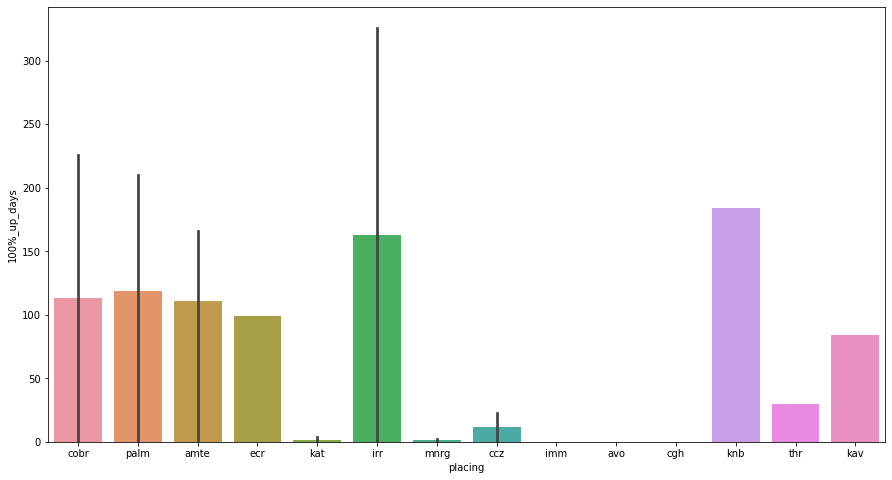

In [20]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x='placing', y='100%_up_days', data=days[(days['highest_roi']<=10)&(days['placing']!='acp')]);

#### （废话）很明显，高ROI与20%利润天数之间有正相关的关系，这个很好理解。

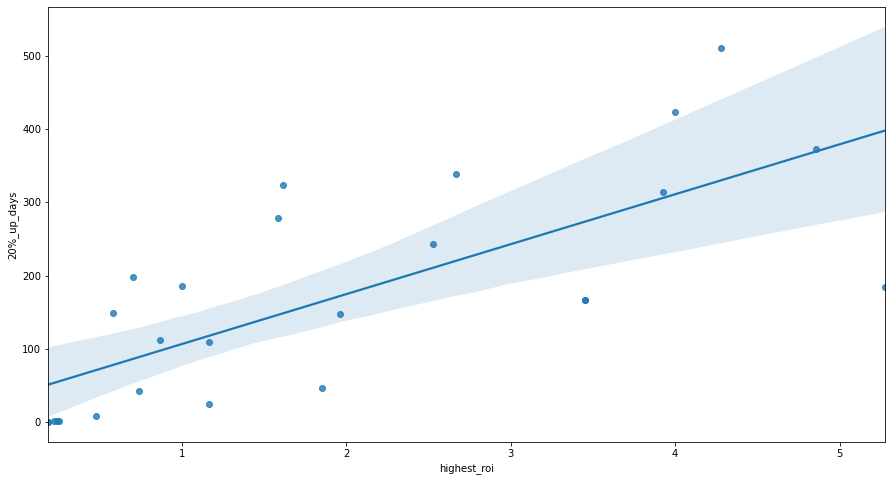

In [21]:
fig = plt.figure(figsize=(15,8))
sns.regplot(x='highest_roi', y='20%_up_days', data=days[days['highest_roi']<=10]);

 以上function由以下代码逐步产生

In [22]:
# df = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/cobr-2021-10.csv')
# df.drop('Unnamed: 0',axis=1, inplace=True)
# df.columns = ['dates', 'close', 'volume']

# price = 0.5
# p1_date = '2020-01-01'
# p1_price = 1.00
# p1_wprice = 2.00

# # 初始Date设置成placing开始的月份, 然后将月份的顺序变成从远到近
# df = df[df['dates']>=p1_date]
# df = df[::-1].reset_index(drop=True)

# # 如果有利润就像是利润，如果没有的话就显示0
# df['share_rtn' ]= [(x-p1_price) if (x-p1_price)>0 else 0 for x in df['close']]
# df['warrant_rtn'] = [(x-p1_wprice) if (x-p1_wprice)>0 else 0 for x in df['close']]
# df['total_rtn'] = df['share_rtn' ] + df['warrant_rtn']
# df.head()

# # 找到近期高点，高点日期，和最大收益
# trade_high = df['close'].max()
# trade_high_date = (df.loc[df['close']==df['close'].max(), 'dates'].item())
# highest_rtn = df['total_rtn'].max()
# print(trade_high, trade_high_date, highest_rtn)

# # 建立一个新df，存入配售名称，配售日期，配售价格，权证价格，高点，高点日期，最高收益，
# placing = pd.DataFrame({'placing':'cobr_p1', 'placing_date':p1_date, 'placing_price':p1_price, 'warrant_price':p1_wprice ,
#                           'trade_high':trade_high, 'trade_high_date':trade_high_date, 'highest_rtn':highest_rtn},index=[0])
# placing

# placing['all_trade_days'] = len(df['close'])

# placing['20%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.2].close)
# placing['30%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.3].close)
# placing['40%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.4].close)
# placing['50%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.5].close)
# placing['70%_up_days'] = len(df[df['total_rtn']/p1_price>= 0.7].close)
# placing['100%_up_days'] = len(df[df['total_rtn']/p1_price>= 1.0].close)
# placing['250%_up_days'] = len(df[df['total_rtn']/p1_price>= 2.5].close)
# placing['300%_up_days'] = len(df[df['total_rtn']/p1_price>= 3.0].close)
# placing['350%_up_days'] = len(df[df['total_rtn']/p1_price>= 3.5].close)
# placing['400%_up_days'] = len(df[df['total_rtn']/p1_price>= 4.0].close)
# placing['450%_up_days'] = len(df[df['total_rtn']/p1_price>= 4.5].close)
# placing['500%_up_days'] = len(df[df['total_rtn']/p1_price>= 5.0].close)



# placing


# df.close.plot();
# df.total_rtn.plot();
# # df.share_rtn.plot();
# # df.warrant_rtn.plot();